### Imports

In [33]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os

## load data

helper function

In [3]:
def calc_mar(margin, nt):
    return margin / nt

In [21]:
j = 1963
year_list = [i+j for i in range(60)]
print(year_list)

[1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [5]:
league = pd.read_csv('engpremierleague.csv')
league['teams_ordered'] = league.teams_ordered.apply(lambda x: x.replace("[", '').replace(']', '').replace('"', '').split(','))
league['num_teams'] = league.teams_ordered.apply(lambda x: len(x))

### Adjusted Champ Margin - champ margin divided by number of teams

league['adjusted_champ_margin'] = league.apply(lambda row: calc_mar(row.champ_margin, row['num_teams']), axis=1)
league

,teams_ordered,champion,champ_points,champ_margin,year,num_teams,adjusted_champ_margin
0,"['Liverpool FC', 'Manchester United', 'Evert...",Liverpool FC,57,4,1963-1964,22,0.181818
1,"['Manchester United', 'Leeds United', 'Chels...",Manchester United,61,0,1964-1965,22,0.000000
2,"['Liverpool FC', 'Leeds United', 'Burnley FC...",Liverpool FC,61,6,1965-1966,22,0.272727
3,"['Manchester United', 'Nottingham Forest', '...",Manchester United,60,4,1966-1967,22,0.181818
4,"['Manchester City', 'Manchester United', 'Li...",Manchester City,58,2,1967-1968,22,0.090909
5,"['Leeds United', 'Liverpool FC', 'Everton FC...",Leeds United,67,6,1968-1969,22,0.272727
6,"['Everton FC', 'Leeds United', 'Chelsea FC',...",Everton FC,66,9,1969-1970,22,0.409091
7,"['Arsenal FC', 'Leeds United', 'Tottenham Ho...",Arsenal FC,65,1,1970-1971,22,0.045455
8,"['Derby County', 'Leeds United', 'Liverpool ...",Derby County,58,1,1971-1972,22,0.045455
9,"['Liverpool FC', 'Arsenal FC', 'Leeds United...",Liverpool FC,60,3,1972-1973,22,0.136364


### Visuialize

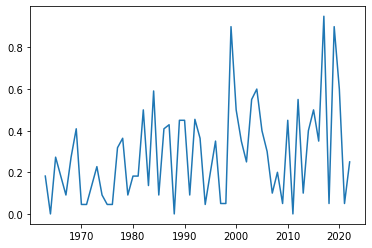

In [22]:
# Visualizing adjusted champ margin
plt.plot(year_list, league.adjusted_champ_margin)
plt.show()
# league.adjusted_champ_margin

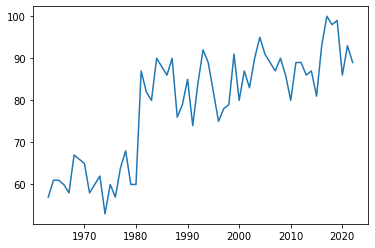

In [46]:
# plot to contextualize the league history, large spike shows when points total was changed
plt.plot(year_list, league.champ_points)
plt.show()

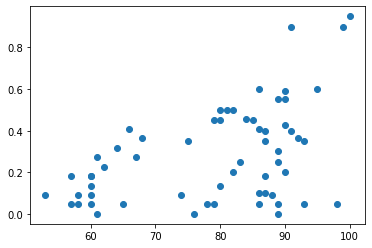

In [24]:
# just a visualization I made for fun
plt.scatter(league.champ_points, league.adjusted_champ_margin)
plt.show()

### top six numbers, as well as champ numbers

shows the amount of different champions and top 6 finishers a league has had, displays turnover

In [26]:
# helper functions for calculations


def check_add(t6l, curr):
    #print(curr)
    for i in curr:
        if i.strip() not in t6l:
            t6l += [i.strip()]

def check_champ(n, curr):
    if n.strip() not in curr:
        curr += [n.strip()]

In [28]:
top_six_seen = []

champs_seen = []

league.teams_ordered.apply(lambda x: check_add(top_six_seen, x[:6]))
league.teams_ordered.apply(lambda x: check_champ(x[0], champs_seen))


print(top_six_seen)
print(len(top_six_seen))

print(champs_seen)
print(len(champs_seen))

["'Liverpool FC'", "'Manchester United'", "'Everton FC'", "'Tottenham Hotspur'", "'Chelsea FC'", "'Sheffield Wednesday'", "'Leeds United'", "'Nottingham Forest'", "'Burnley FC'", "'West Bromwich Albion'", "'Manchester City'", "'Arsenal FC'", "'Derby County'", "'Coventry City'", "'Wolverhampton Wanderers'", "'Ipswich Town'", "'West Ham United'", "'Stoke City'", "'Sheffield United'", "'Queens Park Rangers'", "'Aston Villa'", "'Newcastle United'", "'Southampton FC'", "'Swansea City'", "'Watford FC'", "'Norwich City'", "'Wimbledon FC'", "'Crystal Palace'", "'Blackburn Rovers'", "'Bolton Wanderers'", "'Leicester City'", "'Brighton & Hove Albion'"]
32
["'Liverpool FC'", "'Manchester United'", "'Manchester City'", "'Leeds United'", "'Everton FC'", "'Arsenal FC'", "'Derby County'", "'Nottingham Forest'", "'Aston Villa'", "'Blackburn Rovers'", "'Chelsea FC'", "'Leicester City'"]
12


## Turning everything into functions so we can call it on every dataset

these use the years_list variable in some visualizations, as well as the helper functions

In [63]:
def loading(url):
    '''
    this function loads and cleans the data, returns a prepared dataframe
    '''
    curr_league = pd.read_csv(url)
    curr_league['teams_ordered'] = curr_league.teams_ordered.apply(lambda x: x.replace("[", '').replace(']', '').replace('"', '').split(','))
    curr_league['num_teams'] = curr_league.teams_ordered.apply(lambda x: len(x))
    return curr_league

In [84]:
def adjusted_champ_margin(df, col):
    '''
    calculates and visualizes the champion's margin of victory, visualizes it in a xy-graph
    '''
    df['adjusted_champ_margin'] = df.apply(lambda row: calc_mar(row.champ_margin, row['num_teams']), axis=1)
    plt.plot(year_list, df.adjusted_champ_margin, color=col)
    plt.show()
    

In [85]:
def points_graph(df, col):
    '''
    displays simple xy-graph of total champion points over time
    '''
    plt.plot(year_list, df.champ_points, color=col)
    plt.show()

In [69]:
def champs_and_top6(df):
    '''
    takes in a league dataframe, calculates the amount of distinct teams won the leage and finished in the top 6, returns a tuple
    '''

    top6 = []

    champs = []

    df.teams_ordered.apply(lambda x: check_add(top6, x[:6]))
    df.teams_ordered.apply(lambda x: check_champ(x[0], champs))

    t6 = len(top6)

    c = len(champs)
    
    # first top 6, then champ

    return (t6, c)

## Use all these functions on every single file :)

bundesliga.csv 



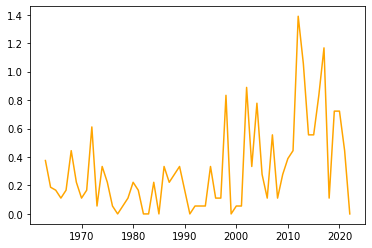

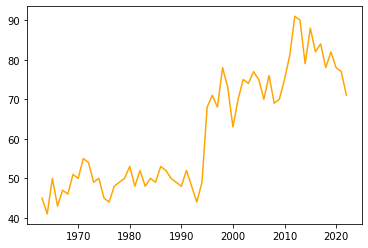

number of teams that finished top six:  36
number of teams that have won:  13


**************************************************


itaseriea.csv 



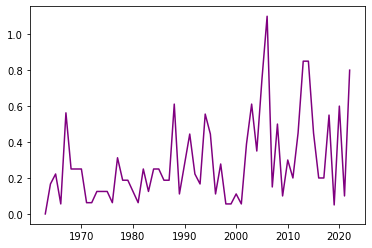

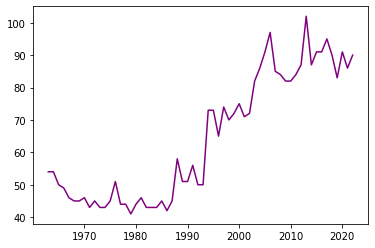

number of teams that finished top six:  24
number of teams that have won:  12


**************************************************


nederedivisie.csv 



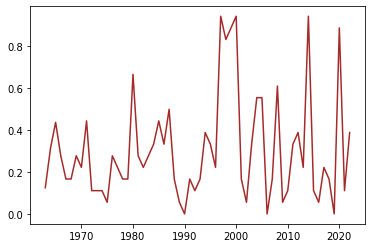

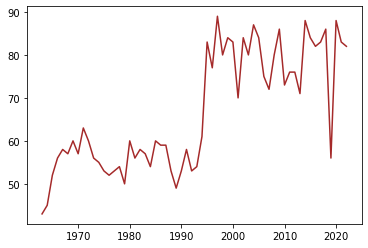

number of teams that finished top six:  33
number of teams that have won:  8


**************************************************


espprimeradivision.csv 



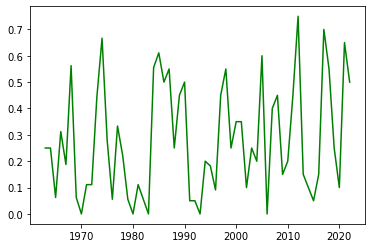

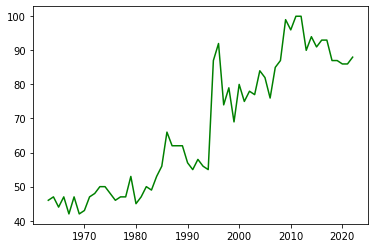

number of teams that finished top six:  31
number of teams that have won:  7


**************************************************


engpremierleague.csv 



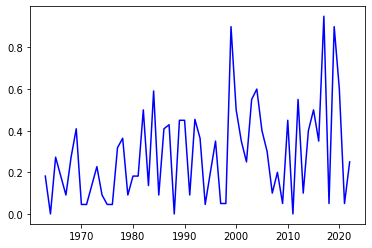

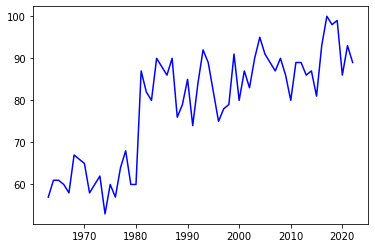

number of teams that finished top six:  32
number of teams that have won:  12


**************************************************


fraligue1.csv 



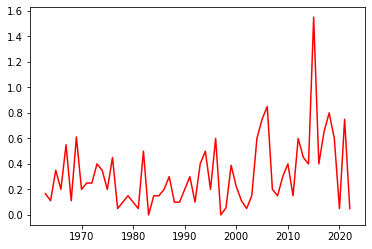

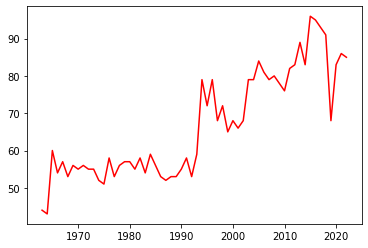

number of teams that finished top six:  32
number of teams that have won:  12


**************************************************


porprimeiraliga.csv 



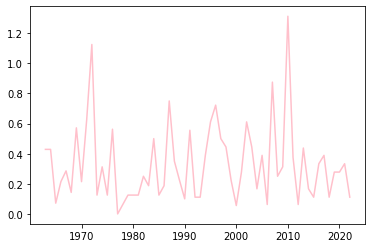

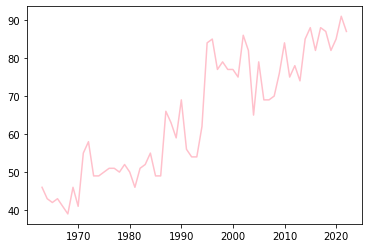

number of teams that finished top six:  30
number of teams that have won:  4


**************************************************




In [86]:
cwd = os.getcwd()
urls = [i for i in os.listdir(cwd) if i[-3:] == 'csv']

## define output colors 

league_name = ['prem', 'bund', 'espp', 'fral', 'itas', 'neder', 'porp']
color = ['blue','orange', 'green', 'red', 'purple', 'brown', 'pink']

for url in urls:
    hold_color = ''
    print(url, "\n")
    curr_league_df = loading(url)
    for i in range(len(league_name)):
        if league_name[i] in url:
            hold_color = color[i]
    adjusted_champ_margin(curr_league_df, hold_color)
    points_graph(curr_league_df, hold_color)
    calc_nums = champs_and_top6(curr_league_df)
    print("number of teams that finished top six: ", calc_nums[0])
    print("number of teams that have won: ", calc_nums[1])
    print("\n")
    print("*"*50)
    print("\n")
